In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

# datetime for manipulating date and time
import datetime

# scipy
import scipy.stats as stats
from scipy.stats import uniform, randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

random.seed(2)

In [2]:
df_features = pd.read_csv("selected_features_augmented.csv")
df_features.head()

,number,madrs2_grouped,madrs2_grouped_ord,Normal,Mild,Moderate,activity_entropy_hourly,activity_entropy_minutely,activity_intraday_variability,activity_kurtosis_daily,...,activity_std_hourly,bout_act_dur_kurtosis,bout_act_dur_std,bout_act_num,bout_inact_dur_cv,bout_inact_dur_entropy,bout_inact_dur_mean,bout_inact_dur_std,cos_day_of_week_amplitude,cos_minute_of_day_phase
0,condition_10a,Moderate,2,False,False,True,3.090006,8.410191,580.313080,4.922353,...,129786.695431,10.882228,29.732939,31.166667,2.608102,3.511655,41.814815,109.057303,23434.769636,-0.000614
1,condition_11a,Moderate,2,False,False,True,2.397121,7.848906,534.242943,11.504620,...,76671.259876,2.839172,9.721434,27.000000,2.644858,3.795606,42.429448,112.219855,101.062863,-0.000728
2,condition_12a,Moderate,2,False,False,True,2.968975,8.229882,413.815384,8.064285,...,54788.003541,15.361190,13.862598,33.833333,2.142199,4.402239,29.528634,63.256206,80852.744355,-0.000654
3,condition_13a,Mild,1,False,True,False,3.030332,8.365675,518.890851,6.814530,...,94796.845395,19.575901,16.398740,44.833333,2.336047,4.230671,24.599057,57.464554,-44.366424,-0.000682
4,condition_14a,Mild,1,False,True,False,2.223746,7.585908,398.457801,14.068851,...,30738.605961,19.880862,5.393473,22.500000,1.548695,4.458634,47.215470,73.122371,17.536681,0.000709


In [3]:
# Shuffle the data

# Extract indices
indices = np.arange(df_features.shape[0])

# Shuffle indices
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)

# Reindex the shuffle indices
df_features = df_features.reindex(shuffled_indices)
display(df_features)

,number,madrs2_grouped,madrs2_grouped_ord,Normal,Mild,Moderate,activity_entropy_hourly,activity_entropy_minutely,activity_intraday_variability,activity_kurtosis_daily,...,activity_std_hourly,bout_act_dur_kurtosis,bout_act_dur_std,bout_act_num,bout_inact_dur_cv,bout_inact_dur_entropy,bout_inact_dur_mean,bout_inact_dur_std,cos_day_of_week_amplitude,cos_minute_of_day_phase
18,condition_5a,Moderate,2,False,False,True,2.960859,8.182483,540.986736,10.101984,...,101040.126543,4.937830,17.387299,30.000000,2.086638,4.423416,31.833333,66.424658,6978.697397,-0.000750
45,control_31a,Normal,0,True,False,False,2.938388,8.401831,740.345685,4.194149,...,194280.251226,161.265243,106.379384,32.333333,2.191905,4.104745,26.936782,59.042862,53764.835985,-0.000552
33,control_20a,Normal,0,True,False,False,2.993996,8.392956,677.387616,8.516200,...,372860.813190,4.993671,25.914818,34.000000,3.300705,3.515589,39.540000,130.509874,53.073465,-0.000590
37,control_24a,Normal,0,True,False,False,2.996455,8.312365,778.282216,6.668680,...,207914.639830,198.447449,98.347249,36.500000,3.316112,3.679262,25.512690,84.602951,9267.163597,-0.000621
109,condition_1mod12,Moderate,2,False,False,True,2.853893,8.197258,561.610970,6.877414,...,94944.013732,3.600113,14.669681,34.833333,2.325003,4.279868,29.693780,69.038117,21138.008335,-0.000637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,condition_1mild16,Mild,1,False,True,False,2.772168,8.034669,547.998616,14.246323,...,104671.211106,30.643617,19.158043,29.333333,1.923370,4.489463,33.433333,64.304656,110.383599,-0.000759
192,condition_1norm51,Normal,0,True,False,False,2.998447,8.298227,651.746232,5.796312,...,144627.762290,19.597564,26.059169,34.000000,2.629000,3.969798,28.163158,74.040956,46537.490559,-0.000594
117,condition_1mod23,Moderate,2,False,False,True,2.899538,8.149140,568.164957,6.510604,...,102103.757054,6.311372,14.544797,34.833333,2.292200,4.112294,34.209677,78.415416,213.395507,-0.000656
47,control_3a,Normal,0,True,False,False,2.974487,8.397519,482.653330,6.766699,...,92598.685731,13.385337,16.883622,40.333333,3.573289,3.447248,38.040936,135.931270,33260.340606,-0.000665


In [4]:
#drop unnecesarry column
df_depression = df_features.drop(['number',
                  'madrs2_grouped',
                  'Normal',
                  'Mild',
                  'Moderate'
                  ], axis=1)

label_names = ['Normal', 'Mild', 'Moderate']

df_depression.head(5)

,madrs2_grouped_ord,activity_entropy_hourly,activity_entropy_minutely,activity_intraday_variability,activity_kurtosis_daily,activity_kurtosis_hourly,activity_kurtosis_minutely,activity_mean,activity_mean_weekdays_0to6,activity_mean_weekdays_6to12,...,activity_std_hourly,bout_act_dur_kurtosis,bout_act_dur_std,bout_act_num,bout_inact_dur_cv,bout_inact_dur_entropy,bout_inact_dur_mean,bout_inact_dur_std,cos_day_of_week_amplitude,cos_minute_of_day_phase
18,2,2.960859,8.182483,540.986736,10.101984,10.127160,14.847760,195.528671,36.923333,141.614286,...,101040.126543,4.937830,17.387299,30.000000,2.086638,4.423416,31.833333,66.424658,6978.697397,-0.000750
45,0,2.938388,8.401831,740.345685,4.194149,10.079684,9.413417,395.617758,42.021429,299.706746,...,194280.251226,161.265243,106.379384,32.333333,2.191905,4.104745,26.936782,59.042862,53764.835985,-0.000552
33,0,2.993996,8.392956,677.387616,8.516200,8.502673,30.009344,351.901091,73.473333,540.189524,...,372860.813190,4.993671,25.914818,34.000000,3.300705,3.515589,39.540000,130.509874,53.073465,-0.000590
37,0,2.996455,8.312365,778.282216,6.668680,7.320785,7.007074,335.324603,50.349524,290.299048,...,207914.639830,198.447449,98.347249,36.500000,3.316112,3.679262,25.512690,84.602951,9267.163597,-0.000621
109,2,2.853893,8.197258,561.610970,6.877414,11.346959,7.683523,219.669618,22.271940,187.347901,...,94944.013732,3.600113,14.669681,34.833333,2.325003,4.279868,29.693780,69.038117,21138.008335,-0.000637


- Need to add a validation split into the data
- test- validation
- train- train
- TOL and epochs

In [5]:
# 1. Preparing data
X = np.array(df_depression.iloc[:, 1:])
X_std = StandardScaler().fit_transform(X)
y = np.array(df_depression.iloc[:, 0])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


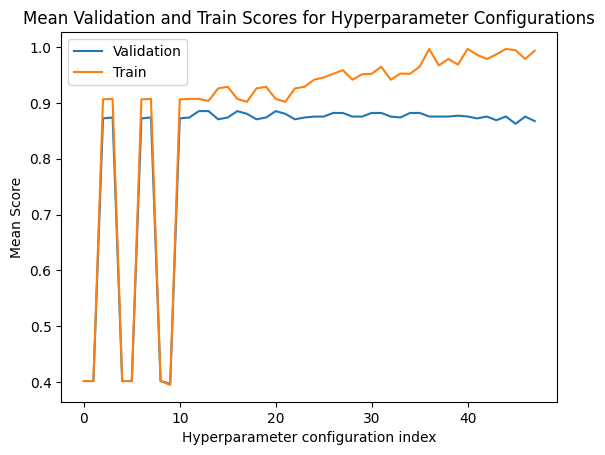

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']  # Add solvers for L1 regularization
grid['max_iter'] = [100, 500, 1000]  # Add max iterations for convergence


# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define the grid search procedure
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', return_train_score=True)

# Execute the grid search
grid_result = grid_search.fit(X_std, y)

# Extract mean test and train scores from the grid search results
test_means = grid_result.cv_results_['mean_test_score']
train_means = grid_result.cv_results_['mean_train_score']

# Plot the mean test and train scores
plt.plot(test_means, label='Validation')
plt.plot(train_means, label='Train')
plt.legend(loc='best')
plt.xlabel('Hyperparameter configuration index')
plt.ylabel('Mean Score')
plt.title('Mean Validation and Train Scores for Hyperparameter Configurations')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with the best hyperparameters
best_log_model = LogisticRegression(
    C=1.0,  # You can set the regularization strength (C) based on your grid search results
    penalty='l2',  # You can choose 'l1' or 'l2' based on your grid search results
    solver='liblinear',  # You can choose 'liblinear' or 'saga' based on your grid search results
    max_iter=500  # You can set max_iter as desired
)

# Train the model on your data (X_std and y)
best_log_model.fit(X_std, y)

# Use the trained model for predictions or other tasks
y_pred = best_log_model.predict(X_std)



cross validation: best_log_model

In [27]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Define the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Define the evaluation procedure with k-fold cross-validation
k_folds = 5
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=1)

# Define the grid search procedure
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Perform the grid search on the data
grid_search.fit(X_std, y)

# Get the best hyperparameters and the corresponding mean test score
best_params = grid_search.best_params_
best_mean_test_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Mean Test Score:", best_mean_test_score)

# Create the logistic regression model with the best hyperparameters
best_log_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter']
)

# Lists to store training and validation scores for each fold
train_accuracies = []
validation_accuracies = []

# Perform cross-validation and get training and validation scores for each fold
for train_index, validation_index in cv.split(X_std, y):
    X_train, X_val = X_std[train_index], X_std[validation_index]
    y_train, y_val = y[train_index], y[validation_index]

    # Train the model on the training set within each fold
    best_log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = best_log_model.score(X_train, y_train)
    validation_accuracy = best_log_model.score(X_val, y_val)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    # Print the accuracy for the current fold
    print(f"Fold {len(train_accuracies)} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Calculate the average and standard deviation of both training and validation accuracies
average_training_accuracy = np.mean(train_accuracies)
std_training_accuracy = np.std(train_accuracies)

average_validation_accuracy = np.mean(validation_accuracies)
std_validation_accuracy = np.std(validation_accuracies)

# Print the overall statistics
print("\nOverall Statistics:")
print("Average Training Accuracy:", average_training_accuracy)
print("Standard Deviation of Training Accuracy:", std_training_accuracy)
print("Average Validation Accuracy:", average_validation_accuracy)
print("Standard Deviation of Validation Accuracy:", std_validation_accuracy)


Best Hyperparameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best Mean Test Score: 0.8871951219512194
Fold 1 - Training Accuracy: 0.9693, Validation Accuracy: 0.9024
Fold 2 - Training Accuracy: 0.9571, Validation Accuracy: 0.8537
Fold 3 - Training Accuracy: 0.9509, Validation Accuracy: 0.9268
Fold 4 - Training Accuracy: 0.9755, Validation Accuracy: 0.8780
Fold 5 - Training Accuracy: 0.9817, Validation Accuracy: 0.8750

Overall Statistics:
Average Training Accuracy: 0.9668936106538979
Standard Deviation of Training Accuracy: 0.011407768042445761
Average Validation Accuracy: 0.8871951219512194
Standard Deviation of Validation Accuracy: 0.025140887961083318


Per iteration

Fold 1 - Training Accuracy: 0.9693, Validation Accuracy: 0.9024
Fold 2 - Training Accuracy: 0.9571, Validation Accuracy: 0.8537
Fold 3 - Training Accuracy: 0.9509, Validation Accuracy: 0.9268
Fold 4 - Training Accuracy: 0.9755, Validation Accuracy: 0.8780
Fold 5 - Training Accuracy: 0.9817, Validation Accuracy: 0.8750

Overall Statistics:
Average Training Accuracy: 0.9668936106538979
Standard Deviation of Training Accuracy: 0.011407768042445761
Average Validation Accuracy: 0.8871951219512194
Standard Deviation of Validation Accuracy: 0.025140887961083318


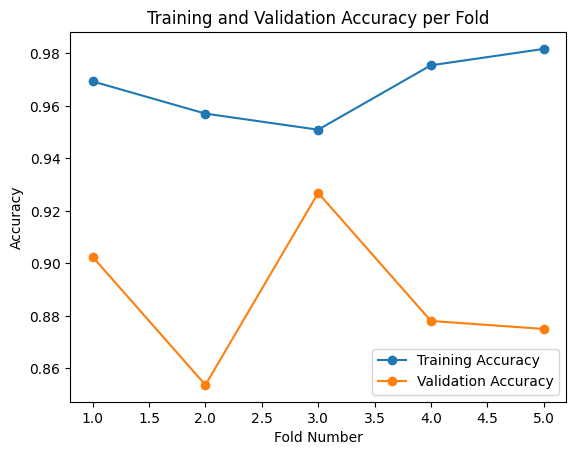

In [29]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Define the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Define the evaluation procedure with k-fold cross-validation
k_folds = 5
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=1)

# Define lists to store training and validation accuracies for each iteration
train_accuracies_per_fold = []
validation_accuracies_per_fold = []

# Perform cross-validation and get training and validation scores for each fold
for train_index, validation_index in cv.split(X_std, y):
    X_train, X_val = X_std[train_index], X_std[validation_index]
    y_train, y_val = y[train_index], y[validation_index]

    # Train the model on the training set within each fold
    log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = log_model.score(X_train, y_train)
    validation_accuracy = log_model.score(X_val, y_val)

    # Append the accuracies to the lists
    train_accuracies_per_fold.append(train_accuracy)
    validation_accuracies_per_fold.append(validation_accuracy)

    # Print the accuracy for the current fold
    print(f"Fold {len(train_accuracies_per_fold)} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Calculate the average and standard deviation of both training and validation accuracies
average_training_accuracy = np.mean(train_accuracies_per_fold)
std_training_accuracy = np.std(train_accuracies_per_fold)

average_validation_accuracy = np.mean(validation_accuracies_per_fold)
std_validation_accuracy = np.std(validation_accuracies_per_fold)

# Print the overall statistics
print("\nOverall Statistics:")
print("Average Training Accuracy:", average_training_accuracy)
print("Standard Deviation of Training Accuracy:", std_training_accuracy)
print("Average Validation Accuracy:", average_validation_accuracy)
print("Standard Deviation of Validation Accuracy:", std_validation_accuracy)

# Plot the training and validation accuracies for each iteration
import matplotlib.pyplot as plt

# Create a list of fold numbers
folds = range(1, k_folds + 1)

# Plot the training and validation accuracies for each iteration
plt.plot(folds, train_accuracies_per_fold, label='Training Accuracy', marker='o')
plt.plot(folds, validation_accuracies_per_fold, label='Validation Accuracy', marker='o')

# Add labels and legend
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Fold')
plt.legend()

# Show the plot
plt.show()


Iteration 1 - Training Accuracy: 0.9693, Validation Accuracy: 0.9024
Iteration 2 - Training Accuracy: 0.9571, Validation Accuracy: 0.8537
Iteration 3 - Training Accuracy: 0.9509, Validation Accuracy: 0.9268
Iteration 4 - Training Accuracy: 0.9755, Validation Accuracy: 0.8780
Iteration 5 - Training Accuracy: 0.9817, Validation Accuracy: 0.8750


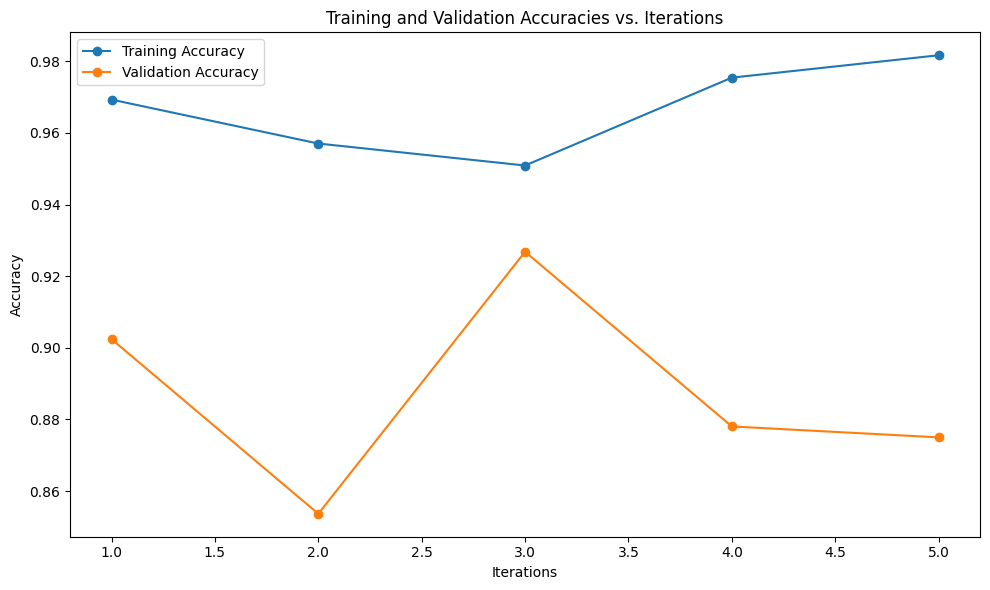

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

# ... (Same code as before up to performing the grid search) ...

# Lists to store training and validation scores for each fold
train_accuracies = []
validation_accuracies = []

# Lists to store hyperparameter configurations for plotting
iterations = []

# Perform cross-validation and get training and validation scores for each fold
for i, (train_index, validation_index) in enumerate(cv.split(X_std, y)):
    X_train, X_val = X_std[train_index], X_std[validation_index]
    y_train, y_val = y[train_index], y[validation_index]

    # Train the model on the training set within each fold
    best_log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = best_log_model.score(X_train, y_train)
    validation_accuracy = best_log_model.score(X_val, y_val)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    # Append the iteration number for the current iteration (fold)
    iterations.append(i + 1)

    # Print the accuracy for the current fold
    print(f"Iteration {i+1} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the training and validation accuracies against the iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(iterations, validation_accuracies, marker='o', linestyle='-', label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies vs. Iterations')
plt.legend()
plt.tight_layout()
plt.show()


cross validation, k-fold split into train and val set

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the evaluation procedure with k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform cross-validation and get training and validation accuracies
train_accuracies = []
validation_accuracies = []
variances = []

for train_index, validation_index in cv.split(X_std, y):
    X_train, X_val = X_std[train_index], X_std[validation_index]
    y_train, y_val = y[train_index], y[validation_index]

    # Train the model on the training set
    log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = log_model.score(X_train, y_train)
    validation_accuracy = log_model.score(X_val, y_val)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    # Calculate and append the variance
    variance = train_accuracy - validation_accuracy
    variances.append(variance)

# Calculate the average train and validation accuracies and variance
average_train_accuracy = np.mean(train_accuracies)
average_validation_accuracy = np.mean(validation_accuracies)
average_variance = np.mean(variances)

print("Average Training Accuracy:", average_train_accuracy)
print("Average Validation Accuracy:", average_validation_accuracy)
print("Average Variance:", average_variance)


Average Training Accuracy: 0.964853608658786
Average Validation Accuracy: 0.8820731707317074
Average Variance: 0.08278043792707863


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the evaluation procedure with k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform cross-validation and get training and validation accuracies
train_accuracies = []
validation_accuracies = []
variances = []

fold = 1
for train_index, validation_index in cv.split(X_std, y):
    X_train, X_val = X_std[train_index], X_std[validation_index]
    y_train, y_val = y[train_index], y[validation_index]

    # Train the model on the training set
    log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = log_model.score(X_train, y_train)
    validation_accuracy = log_model.score(X_val, y_val)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    # Calculate and append the variance
    variance = train_accuracy - validation_accuracy
    variances.append(variance)

    # Print the accuracy for the current fold
    print(f"Fold {fold} - Training Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}")

    fold += 1

# Calculate the average train and validation accuracies and variance
average_train_accuracy = np.mean(train_accuracies)
average_validation_accuracy = np.mean(validation_accuracies)
#average_variance = np.mean(variances)

print("Average Training Accuracy:", average_train_accuracy)
print("Average Validation Accuracy:", average_validation_accuracy)
#print("Average Variance:", average_variance)


Fold 1 - Training Accuracy: 0.9693251533742331, Validation Accuracy: 0.9024390243902439
Fold 2 - Training Accuracy: 0.9570552147239264, Validation Accuracy: 0.8536585365853658
Fold 3 - Training Accuracy: 0.950920245398773, Validation Accuracy: 0.926829268292683
Fold 4 - Training Accuracy: 0.9754601226993865, Validation Accuracy: 0.8780487804878049
Fold 5 - Training Accuracy: 0.9817073170731707, Validation Accuracy: 0.875
Fold 6 - Training Accuracy: 0.9631901840490797, Validation Accuracy: 0.9512195121951219
Fold 7 - Training Accuracy: 0.9570552147239264, Validation Accuracy: 0.9024390243902439
Fold 8 - Training Accuracy: 0.9570552147239264, Validation Accuracy: 0.9024390243902439
Fold 9 - Training Accuracy: 0.9631901840490797, Validation Accuracy: 0.9024390243902439
Fold 10 - Training Accuracy: 0.975609756097561, Validation Accuracy: 0.775
Fold 11 - Training Accuracy: 0.9754601226993865, Validation Accuracy: 0.8292682926829268
Fold 12 - Training Accuracy: 0.950920245398773, Validation 

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']  # Add solvers for L1 regularization
grid['max_iter'] = [100, 500, 1000]  # Add max iterations for convergence

# Define the evaluation procedure with k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform grid search and get training and validation accuracies
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            # Set hyperparameters for logistic regression
            log_model.set_params(C=c, penalty=penalty, solver=solver)

            # Perform cross-validation and get training and validation scores
            train_accuracy = np.mean(cross_val_score(log_model, X_std, y, cv=cv))

            # Create a separate cross-validation object for validation accuracy
            cv_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2)
            validation_accuracy = np.mean(cross_val_score(log_model, X_std, y, cv=cv_validation))

            # Calculate and print the variance
            variance = train_accuracy - validation_accuracy

            print(f"C: {c}, Penalty: {penalty}, Solver: {solver}")
            print("Training Accuracy:", train_accuracy)
            print("Validation Accuracy:", validation_accuracy)
            print("Variance:", variance)
            print("---------------------")


C: 0.01, Penalty: l1, Solver: liblinear
Training Accuracy: 0.40195121951219526
Validation Accuracy: 0.40195121951219526
Variance: 0.0
---------------------
C: 0.01, Penalty: l1, Solver: saga
Training Accuracy: 0.40195121951219526
Validation Accuracy: 0.40195121951219526
Variance: 0.0
---------------------
C: 0.01, Penalty: l2, Solver: liblinear
Training Accuracy: 0.8722764227642278
Validation Accuracy: 0.8839837398373985
Variance: -0.011707317073170742
---------------------
C: 0.01, Penalty: l2, Solver: saga
Training Accuracy: 0.8739837398373985
Validation Accuracy: 0.8807317073170733
Variance: -0.006747967479674766
---------------------
C: 0.1, Penalty: l1, Solver: liblinear
Training Accuracy: 0.8853658536585367
Validation Accuracy: 0.8872357723577237
Variance: -0.0018699186991869565
---------------------
C: 0.1, Penalty: l1, Solver: saga
Training Accuracy: 0.8805284552845529
Validation Accuracy: 0.8758130081300816
Variance: 0.004715447154471364
---------------------
C: 0.1, Penalty: 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

C: 1, Penalty: l1, Solver: saga
Training Accuracy: 0.875609756097561
Validation Accuracy: 0.869268292682927
Variance: 0.00634146341463393
---------------------
C: 1, Penalty: l2, Solver: liblinear
Training Accuracy: 0.8820731707317075
Validation Accuracy: 0.8789837398373984
Variance: 0.003089430894309131
---------------------
C: 1, Penalty: l2, Solver: saga
Training Accuracy: 0.8820731707317074
Validation Accuracy: 0.8773983739837399
Variance: 0.004674796747967558
---------------------
C: 10, Penalty: l1, Solver: liblinear
Training Accuracy: 0.8757317073170733
Validation Accuracy: 0.8741463414634147
Variance: 0.001585365853658538
---------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

C: 10, Penalty: l1, Solver: saga
Training Accuracy: 0.8723170731707319
Validation Accuracy: 0.8561788617886179
Variance: 0.01613821138211402
---------------------
C: 10, Penalty: l2, Solver: liblinear
Training Accuracy: 0.8756097560975611
Validation Accuracy: 0.8692276422764228
Variance: 0.006382113821138291
---------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

C: 10, Penalty: l2, Solver: saga
Training Accuracy: 0.8690243902439025
Validation Accuracy: 0.8561382113821138
Variance: 0.012886178861788777
---------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']  # Add solvers for L1 regularization

# Define the evaluation procedure with k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform grid search and get training and validation accuracies
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            # Set hyperparameters for logistic regression
            log_model.set_params(C=c, penalty=penalty, solver=solver)

            # Perform cross-validation and get training and validation scores
            train_accuracy = np.mean(cross_val_score(log_model, X_std, y, cv=cv))
            validation_accuracy = np.mean(cross_val_score(log_model, X_std, y, cv=cv))

            # Calculate and print the variance
            variance = train_accuracy - validation_accuracy

            print(f"C: {c}, Penalty: {penalty}, Solver: {solver}")
            print("Training Accuracy:", train_accuracy)
            print("Validation Accuracy:", validation_accuracy)
            print("Variance:", variance)
            print("---------------------")


C: 0.01, Penalty: l1, Solver: liblinear
Training Accuracy: 0.40195121951219526
Validation Accuracy: 0.40195121951219526
Variance: 0.0
---------------------
C: 0.01, Penalty: l1, Solver: saga
Training Accuracy: 0.39528455284552855
Validation Accuracy: 0.40195121951219526
Variance: -0.00666666666666671
---------------------
C: 0.01, Penalty: l2, Solver: liblinear
Training Accuracy: 0.8722764227642278
Validation Accuracy: 0.8722764227642278
Variance: 0.0
---------------------
C: 0.01, Penalty: l2, Solver: saga
Training Accuracy: 0.8739837398373985
Validation Accuracy: 0.8739837398373985
Variance: 0.0
---------------------
C: 0.1, Penalty: l1, Solver: liblinear
Training Accuracy: 0.8853658536585367
Validation Accuracy: 0.8853658536585367
Variance: 0.0
---------------------
C: 0.1, Penalty: l1, Solver: saga
Training Accuracy: 0.8805284552845529
Validation Accuracy: 0.8805284552845529
Variance: 0.0
---------------------
C: 0.1, Penalty: l2, Solver: liblinear
Training Accuracy: 0.870691056910

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

C: 1, Penalty: l1, Solver: saga
Training Accuracy: 0.875609756097561
Validation Accuracy: 0.875609756097561
Variance: 0.0
---------------------
C: 1, Penalty: l2, Solver: liblinear
Training Accuracy: 0.8820731707317075
Validation Accuracy: 0.8820731707317075
Variance: 0.0
---------------------
C: 1, Penalty: l2, Solver: saga
Training Accuracy: 0.8820731707317074
Validation Accuracy: 0.8820731707317074
Variance: 0.0
---------------------
C: 10, Penalty: l1, Solver: liblinear
Training Accuracy: 0.8757317073170733
Validation Accuracy: 0.8757317073170733
Variance: 0.0
---------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

C: 10, Penalty: l1, Solver: saga
Training Accuracy: 0.8723170731707319
Validation Accuracy: 0.8723170731707319
Variance: 0.0
---------------------
C: 10, Penalty: l2, Solver: liblinear
Training Accuracy: 0.8756097560975611
Validation Accuracy: 0.8756097560975611
Variance: 0.0
---------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

C: 10, Penalty: l2, Solver: saga
Training Accuracy: 0.8690243902439025
Validation Accuracy: 0.8690243902439025
Variance: 0.0
---------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

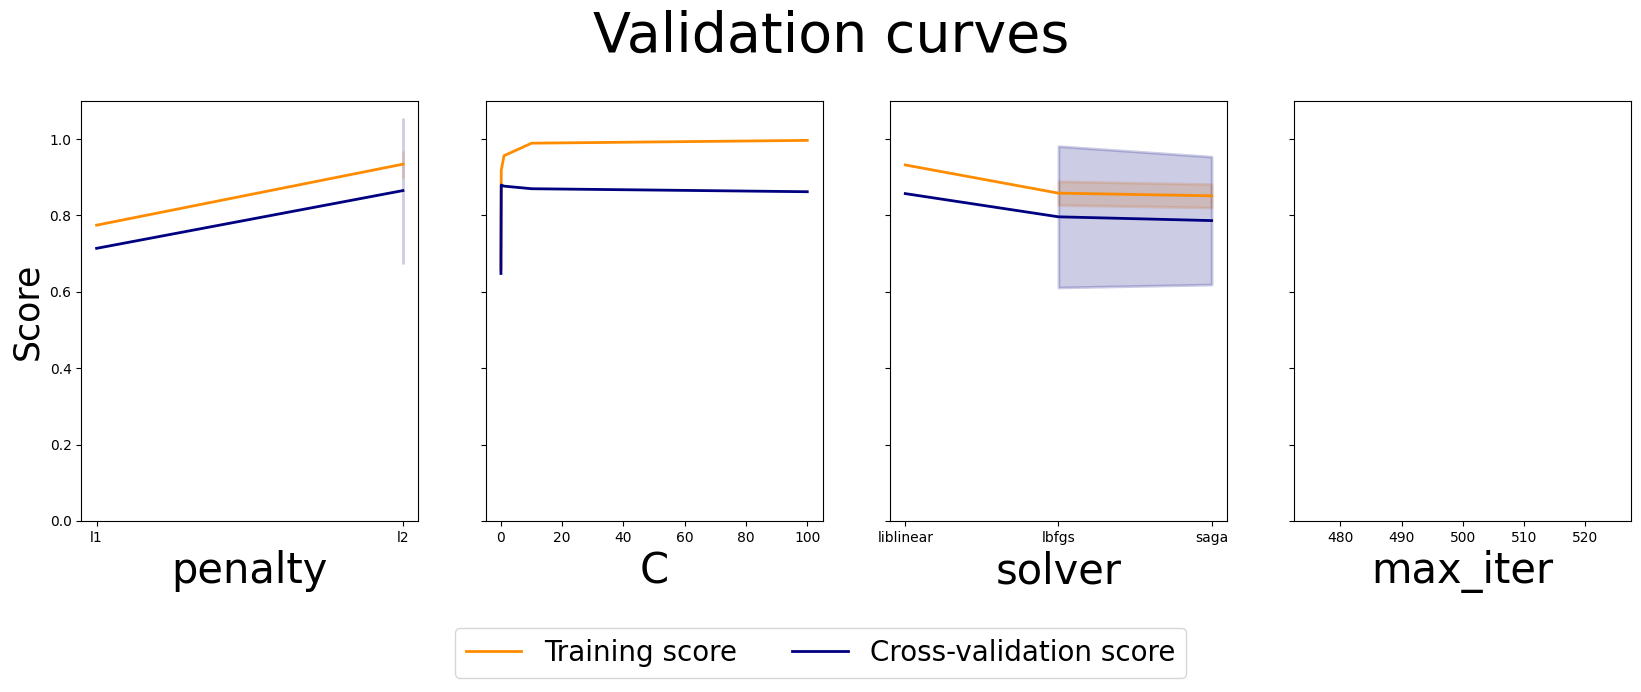

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

grid_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [500]
}

cv = 5
gs = GridSearchCV(
    LogisticRegression(random_state=42),
    grid_params,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    return_train_score=True  # set this for train score
)


gs.fit(X_std, y)

import pandas  as pd
df = pd.DataFrame(gs.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score',
           'std_train_score']

# https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
def pooled_var(stds):
    n = cv # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, len(grid_params),
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)
lw = 2

for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    axes[idx].plot(param_range,
                grouped_df['mean_train_score'],
                label="Training score",
                color="darkorange",
                lw=lw)
    axes[idx].fill_between(param_range,
                grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                grouped_df['mean_train_score'] + grouped_df['std_train_score'],
                alpha=0.2,
                color="darkorange",
                lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="navy",
                lw=lw)
    axes[idx].fill_between(param_range,
                    grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'],
                    alpha=0.2,
                    color="navy",
                    lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)
plt.show()


Implement on training set only, whole dataset

In [ ]:
def find_best_features(dataframe):
    # Preparing data
    X = dataframe.drop(columns=df_depression.columns[0])
    X_std = StandardScaler().fit_transform(X)
    y = np.array(df_depression.iloc[:, 0])

    # Logistic Regression with Cross-Validation for average accuracy score and variance
    log_clf = LogisticRegression(random_state=42)
    log_scorescv = cross_val_score(log_clf, X_std, y, scoring="accuracy", cv=5)
    log_varcv = cross_val_score(log_clf, X_std, y, scoring="neg_mean_squared_error", cv=5)

    # Grid Search for best hyperparameters
    logpram_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'penalty': ['l1', 'l2']}

    log = LogisticRegression(max_iter=500)
    loggrid_search = GridSearchCV(log, param_grid=logpram_grid, cv=5)
    loggrid_search.fit(X_std, y)
    best_params = loggrid_search.best_params_
    best_score = loggrid_search.best_score_

    # Train a logistic regression model with the best hyperparameters
    log_best = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
    log_best.fit(X_std, y)

    # 5-fold Cross-Validation on the best model
    best_scorescv = cross_val_score(log_best, X_std, y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(best_scorescv)

    return mean_accuracy

# Example usage with your dataframe df_depression
best_features_accuracy = find_best_features(df_depression)
print("Mean accuracy with best features: ", best_features_accuracy)

Mean accuracy with best features:  0.8873170731707317


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# 1. Preparing data
X = np.array(df_depression.iloc[:, 1:])
X_std = StandardScaler().fit_transform(X)
y = np.array(df_depression.iloc[:, 0])

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [ ]:
# 2. log regression -> cv score
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# 2. implementing variance for each fold
log_varcv = cross_val_score(log_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
log_varcv

array([-0.3030303 , -0.24242424, -0.42424242, -0.15625   , -0.1875    ])

In [ ]:
# 3. find the best hyper-parameter for LR classifier
# setting out grid search for best hyper-parameters
logpram_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 10],
                'penalty': ['l1', 'l2']}

In [ ]:
# create a logistic regression model
log = LogisticRegression(max_iter=500)

In [ ]:
# perform grid search with cross validation
loggrid_search = GridSearchCV(log, param_grid = logpram_grid, cv=5)
loggrid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10],
                         'penalty': ['l1', 'l2']})

In [ ]:
# print the best hyperparameters and score
print("Best hyper-parameters: ", loggrid_search.best_params_)
print("Best score: ", loggrid_search.best_score_)

Best hyper-parameters:  {'C': 1, 'penalty': 'l2'}
Best score:  0.9020833333333333


In [ ]:
# train a logistic regression model on the training set with the best hyperparameters
log_best = LogisticRegression(C= 1, penalty= 'l2')
log_best.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
# 5-fold cross validation
best_scorescv = cross_val_score(log_best, X_train, y_train, cv= 5, scoring = 'accuracy')
print(best_scorescv)

[0.87878788 0.93939394 0.84848485 0.9375     0.90625   ]


In [ ]:
# 5 fold cross validation on all features- training
mean35_train = np.mean(best_scorescv)
mean35_train

0.9020833333333333

Implementing entire data on validation set

In [ ]:
# 2. log regression -> cv score
log_clf_val = LogisticRegression(random_state=42)
log_clf_val.fit(X_val, y_val)

LogisticRegression(random_state=42)

In [ ]:
# 2. implementing variance for each fold
log_varcv_val = cross_val_score(log_clf, X_val, y_val, scoring="neg_mean_squared_error", cv=5)
log_varcv_val

array([-0.55555556, -0.5       , -0.5       , -0.75      , -0.        ])

In [ ]:
# 3. find the best hyper-parameter for LR classifier
# setting out grid search for best hyper-parameters
logpram_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 10],
                'penalty': ['l1', 'l2']}

In [ ]:
# create a logistic regression model
log = LogisticRegression(max_iter=500)

In [ ]:
# perform grid search with cross validation
loggrid_search = GridSearchCV(log, param_grid = logpram_grid, cv=5)
loggrid_search.fit(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10],
                         'penalty': ['l1', 'l2']})

In [ ]:
# print the best hyperparameters and score
print("Best hyper-parameters: ", loggrid_search.best_params_)
print("Best score: ", loggrid_search.best_score_)

Best hyper-parameters:  {'C': 1, 'penalty': 'l2'}
Best score:  0.8305555555555555


In [ ]:
# 5-fold cross validation
best_scorescv = cross_val_score(log_best, X_val, y_val, cv= 5, scoring = 'accuracy')
print(best_scorescv)

[0.77777778 0.875      0.875      0.625      1.        ]


In [ ]:
# 5 fold cross validation on all features- training
mean35_val = np.mean(best_scorescv)
mean35_val

0.8305555555555555

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Assuming you have X_std_5 and y from your data
# X_std_5: Your feature data with only the first 5 features after standardization
# y: Your target variable

# Number of features (replace with the actual number of features in your data)
num_features = X_std.shape[1]

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']
grid['max_iter'] = [100, 500, 1000]

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Store the results in lists
num_features_list = []
learning_rate_list = []
train_accuracy_list = []
validation_accuracy_list = []
variance_list = []

# Perform the grid search and store the results
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            for max_iter in grid['max_iter']:
                # Set hyperparameters for logistic regression
                log_model.set_params(C=c, penalty=penalty, solver=solver, max_iter=max_iter)

                # Calculate training and validation accuracy using cross-validation
                train_accuracy = np.mean(cross_val_score(log_model, X_std, y, cv=cv))
                validation_accuracy = np.mean(cross_val_score(log_model, X_std, y, cv=cv))
                variance = train_accuracy - validation_accuracy

                # Append the results to the lists
                num_features_list.append(num_features)
                learning_rate_list.append(c)
                train_accuracy_list.append(train_accuracy)
                validation_accuracy_list.append(validation_accuracy)
                variance_list.append(variance)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    "Number of Features": num_features_list,
    "Learning Rate": learning_rate_list,
    "Training Accuracy": train_accuracy_list,
    "Validation Accuracy": validation_accuracy_list,
    "Variance": variance_list
})

#print(results_table)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# Sort the results_table DataFrame based on "Validation Accuracy" in descending order and "Variance" in ascending order
sorted_results = results_table.sort_values(by=["Validation Accuracy", "Variance"], ascending=[False, True])

# Get the best hyperparameter configuration (top row of the sorted DataFrame)
best_hyperparameters = sorted_results.iloc[0]

print("Best Hyperparameter Configuration:")
print(best_hyperparameters)

Best Hyperparameter Configuration:
Number of Features     30.000000
Learning Rate           0.100000
Training Accuracy       0.885447
Validation Accuracy     0.885447
Variance                0.000000
Name: 15, dtype: float64


First 5 features

Implement on training set: first 5 features

In [7]:
# 1. Preparing data- first 5 features
X_5 = np.array(df_depression.iloc[:, 1:6])
X_std_5 = StandardScaler().fit_transform(X_5)
y = np.array(df_depression.iloc[:, 0])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


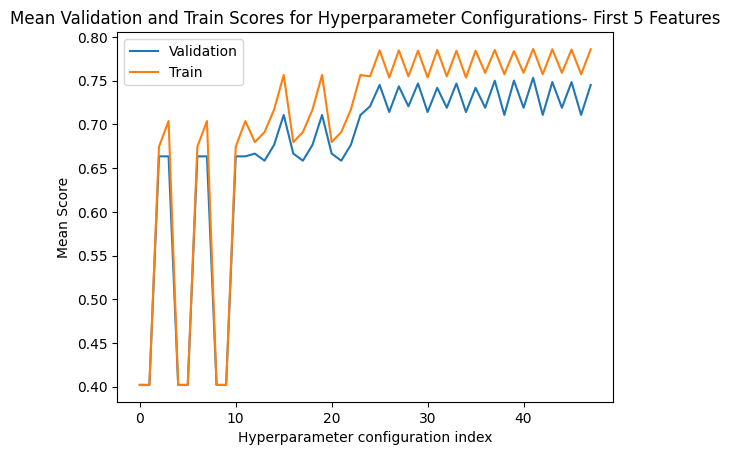

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']  # Add solvers for L1 regularization
grid['max_iter'] = [100, 500, 1000]  # Add max iterations for convergence


# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define the grid search procedure
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', return_train_score=True)

# Execute the grid search
grid_result = grid_search.fit(X_std_5, y)

# Extract mean test and train scores from the grid search results
test_means = grid_result.cv_results_['mean_test_score']
train_means = grid_result.cv_results_['mean_train_score']

# Plot the mean test and train scores
plt.plot(test_means, label='Validation')
plt.plot(train_means, label='Train')
plt.legend(loc='best')
plt.xlabel('Hyperparameter configuration index')
plt.ylabel('Mean Score')
plt.title('Mean Validation and Train Scores for Hyperparameter Configurations- First 5 Features')
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Assuming you have X_std_5 and y from your data
# X_std_5: Your feature data with only the first 5 features after standardization
# y: Your target variable

# Number of features (replace with the actual number of features in your data)
num_features = X_std_5.shape[1]

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']
grid['max_iter'] = [100, 500, 1000]

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Store the results in lists
num_features_list = []
learning_rate_list = []
train_accuracy_list = []
validation_accuracy_list = []
variance_list = []

# Perform the grid search and store the results
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            for max_iter in grid['max_iter']:
                # Set hyperparameters for logistic regression
                log_model.set_params(C=c, penalty=penalty, solver=solver, max_iter=max_iter)

                # Calculate training and validation accuracy using cross-validation
                train_accuracy = np.mean(cross_val_score(log_model, X_std_5, y, cv=cv))
                validation_accuracy = np.mean(cross_val_score(log_model, X_std_5, y, cv=cv))
                variance = train_accuracy - validation_accuracy

                # Append the results to the lists
                num_features_list.append(num_features)
                learning_rate_list.append(c)
                train_accuracy_list.append(train_accuracy)
                validation_accuracy_list.append(validation_accuracy)
                variance_list.append(variance)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    "Number of Features": num_features_list,
    "Learning Rate": learning_rate_list,
    "Training Accuracy": train_accuracy_list,
    "Validation Accuracy": validation_accuracy_list,
    "Variance": variance_list
})

print(results_table)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

    Number of Features  Learning Rate  Training Accuracy  Validation Accuracy  \
0                    5           0.01           0.401951             0.401951   
1                    5           0.01           0.401951             0.401951   
2                    5           0.01           0.401951             0.401951   
3                    5           0.01           0.395447             0.401951   
4                    5           0.01           0.401951             0.401951   
5                    5           0.01           0.401951             0.401951   
6                    5           0.01           0.663415             0.663415   
7                    5           0.01           0.663415             0.663415   
8                    5           0.01           0.663415             0.663415   
9                    5           0.01           0.663455             0.663455   
10                   5           0.01           0.663455             0.663455   
11                   5      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
# Sort the results_table DataFrame based on "Validation Accuracy" in descending order and "Variance" in ascending order
sorted_results = results_table.sort_values(by=["Validation Accuracy", "Variance"], ascending=[False, True])

# Get the best hyperparameter configuration (top row of the sorted DataFrame)
best_hyperparameters = sorted_results.iloc[0]

print("Best Hyperparameter Configuration:")
print(best_hyperparameters)


Best Hyperparameter Configuration:
Number of Features      5.000000
Learning Rate          10.000000
Training Accuracy       0.751667
Validation Accuracy     0.751667
Variance                0.000000
Name: 40, dtype: float64


First 10 features

Implement on training set: first 10 features

In [12]:
# 1. Preparing data
X_10 = np.array(df_depression.iloc[:, 1:11])
X_std_10 = StandardScaler().fit_transform(X_10)
y = np.array(df_depression.iloc[:, 0])

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


# Number of features (replace with the actual number of features in your data)
num_features = X_std_10.shape[1]

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']
grid['max_iter'] = [100, 500, 1000]

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Store the results in lists
num_features_list = []
learning_rate_list = []
train_accuracy_list = []
validation_accuracy_list = []
variance_list = []

# Perform the grid search and store the results
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            for max_iter in grid['max_iter']:
                # Set hyperparameters for logistic regression
                log_model.set_params(C=c, penalty=penalty, solver=solver, max_iter=max_iter)

                # Calculate training and validation accuracy using cross-validation
                train_accuracy = np.mean(cross_val_score(log_model, X_std_10, y, cv=cv))
                validation_accuracy = np.mean(cross_val_score(log_model, X_std_10, y, cv=cv))
                variance = train_accuracy - validation_accuracy

                # Append the results to the lists
                num_features_list.append(num_features)
                learning_rate_list.append(c)
                train_accuracy_list.append(train_accuracy)
                validation_accuracy_list.append(validation_accuracy)
                variance_list.append(variance)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    "Number of Features": num_features_list,
    "Learning Rate": learning_rate_list,
    "Training Accuracy": train_accuracy_list,
    "Validation Accuracy": validation_accuracy_list,
    "Variance": variance_list
})

#print(results_table)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [14]:
# Sort the results_table DataFrame based on "Validation Accuracy" in descending order and "Variance" in ascending order
sorted_results = results_table.sort_values(by=["Validation Accuracy", "Variance"], ascending=[False, True])

# Get the best hyperparameter configuration (top row of the sorted DataFrame)
best_hyperparameters = sorted_results.iloc[0]

print("Best Hyperparameter Configuration:")
print(best_hyperparameters)

Best Hyperparameter Configuration:
Number of Features     10.000000
Learning Rate           0.100000
Training Accuracy       0.831626
Validation Accuracy     0.831626
Variance                0.000000
Name: 21, dtype: float64


First 15 features

Implement on training set: first 15 features

In [15]:
# 1. Preparing data
X_15 = np.array(df_depression.iloc[:, 1:16])
X_std_15 = StandardScaler().fit_transform(X_15)
y = np.array(df_depression.iloc[:, 0])

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Number of features (replace with the actual number of features in your data)
num_features = X_std_15.shape[1]

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']
grid['max_iter'] = [100, 500, 1000]

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Store the results in lists
num_features_list = []
learning_rate_list = []
train_accuracy_list = []
validation_accuracy_list = []
variance_list = []

# Perform the grid search and store the results
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            for max_iter in grid['max_iter']:
                # Set hyperparameters for logistic regression
                log_model.set_params(C=c, penalty=penalty, solver=solver, max_iter=max_iter)

                # Calculate training and validation accuracy using cross-validation
                train_accuracy = np.mean(cross_val_score(log_model, X_std_15, y, cv=cv))
                validation_accuracy = np.mean(cross_val_score(log_model, X_std_15, y, cv=cv))
                variance = train_accuracy - validation_accuracy

                # Append the results to the lists
                num_features_list.append(num_features)
                learning_rate_list.append(c)
                train_accuracy_list.append(train_accuracy)
                validation_accuracy_list.append(validation_accuracy)
                variance_list.append(variance)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    "Number of Features": num_features_list,
    "Learning Rate": learning_rate_list,
    "Training Accuracy": train_accuracy_list,
    "Validation Accuracy": validation_accuracy_list,
    "Variance": variance_list
})

#print(results_table)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [17]:
# Sort the results_table DataFrame based on "Validation Accuracy" in descending order and "Variance" in ascending order
sorted_results = results_table.sort_values(by=["Validation Accuracy", "Variance"], ascending=[False, True])

# Get the best hyperparameter configuration (top row of the sorted DataFrame)
best_hyperparameters = sorted_results.iloc[0]

print("Best Hyperparameter Configuration:")
print(best_hyperparameters)

Best Hyperparameter Configuration:
Number of Features     15.000000
Learning Rate           0.100000
Training Accuracy       0.880447
Validation Accuracy     0.880447
Variance                0.000000
Name: 12, dtype: float64


First 20 features

In [18]:
# 1. Preparing data
X_20 = np.array(df_depression.iloc[:, 1:21])
X_std_20 = StandardScaler().fit_transform(X_20)
y = np.array(df_depression.iloc[:, 0])

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Assuming you have X_std_5 and y from your data
# X_std_5: Your feature data with only the first 5 features after standardization
# y: Your target variable

# Number of features (replace with the actual number of features in your data)
num_features = X_std_20.shape[1]

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']
grid['max_iter'] = [100, 500, 1000]

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Store the results in lists
num_features_list = []
learning_rate_list = []
train_accuracy_list = []
validation_accuracy_list = []
variance_list = []

# Perform the grid search and store the results
for c in grid['C']:
    for penalty in grid['penalty']:
        for solver in grid['solver']:
            for max_iter in grid['max_iter']:
                # Set hyperparameters for logistic regression
                log_model.set_params(C=c, penalty=penalty, solver=solver, max_iter=max_iter)

                # Calculate training and validation accuracy using cross-validation
                train_accuracy = np.mean(cross_val_score(log_model, X_std_20, y, cv=cv))
                validation_accuracy = np.mean(cross_val_score(log_model, X_std_20, y, cv=cv))
                variance = train_accuracy - validation_accuracy

                # Append the results to the lists
                num_features_list.append(num_features)
                learning_rate_list.append(c)
                train_accuracy_list.append(train_accuracy)
                validation_accuracy_list.append(validation_accuracy)
                variance_list.append(variance)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    "Number of Features": num_features_list,
    "Learning Rate": learning_rate_list,
    "Training Accuracy": train_accuracy_list,
    "Validation Accuracy": validation_accuracy_list,
    "Variance": variance_list
})

#print(results_table)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [20]:
# Sort the results_table DataFrame based on "Validation Accuracy" in descending order and "Variance" in ascending order
sorted_results = results_table.sort_values(by=["Validation Accuracy", "Variance"], ascending=[False, True])

# Get the best hyperparameter configuration (top row of the sorted DataFrame)
best_hyperparameters = sorted_results.iloc[0]

print("Best Hyperparameter Configuration:")
print(best_hyperparameters)

Best Hyperparameter Configuration:
Number of Features     20.000000
Learning Rate          10.000000
Training Accuracy       0.882317
Validation Accuracy     0.882317
Variance                0.000000
Name: 42, dtype: float64


In [21]:
import pandas as pd

# Create a table-like structure to display the results
results_table1 = pd.DataFrame({
    "Data feature subset": [
        "All features", "First 5 Features", "First 10 Features", "First 15 Features", "First 20 Features"
    ] * 2,
    "Train/ Val": [
        "Train", "Train", "Train", "Train", "Train",
        "Validation", "Validation", "Validation", "Validation", "Validation"
    ],
    "Fold 1 Score": [
        0.88, 0.73, 0.88, 0.88, 0.85,
        0.78, 0.44, 0.88, 0.88, 0.67
    ],
    "Fold 2 Score": [
        0.94, 0.79, 0.88, 0.88, 0.88,
        0.88, 0.63, 0.88, 0.94, 0.88
    ],
    "Fold 3 Score": [
        0.85, 0.67, 0.88, 0.94, 0.85,
        0.88, 0.75, 0.94, 0.85, 0.94
    ],
    "Fold 4 Score": [
        0.94, 0.81, 0.88, 0.85, 0.94,
        0.63, 0.5, 0.88, 0.94, 0.88
    ],
    "Fold 5 Score": [
        0.91, 0.81, 0.88, 0.91, 0.94,
        1.0, 0.75, 0.88, 0.91, 1.0
    ],
    "Best hyper-parameters": [
        "'C': 1, l2", "'C': 10, l2", "'C': 0.1, l2", "'C': 1, l2", "'C': 1, l2",
        "'C': 1, l2", "'C': 0.1, l2", "'C': 1, l2", "'C': 1, l2", "'C': 0.1, l2"
    ],
    "Hyper-parameter mean score": [0.90, 0.76, 0.88, 0.90, 0.89, 0.83, 0.61, 0.83, 0.86, 0.86]
})


In [23]:
results_table1

,Data feature subset,Train/ Val,Fold 1 Score,Fold 2 Score,Fold 3 Score,Fold 4 Score,Fold 5 Score,Best hyper-parameters,Hyper-parameter mean score
0,All features,Train,0.88,0.94,0.85,0.94,0.91,"'C': 1, l2",0.90
1,First 5 Features,Train,0.73,0.79,0.67,0.81,0.81,"'C': 10, l2",0.76
2,First 10 Features,Train,0.88,0.88,0.88,0.88,0.88,"'C': 0.1, l2",0.88
3,First 15 Features,Train,0.88,0.88,0.94,0.85,0.91,"'C': 1, l2",0.90
4,First 20 Features,Train,0.85,0.88,0.85,0.94,0.94,"'C': 1, l2",0.89
5,All features,Validation,0.78,0.88,0.88,0.63,1.00,"'C': 1, l2",0.83
6,First 5 Features,Validation,0.44,0.63,0.75,0.50,0.75,"'C': 0.1, l2",0.61
7,First 10 Features,Validation,0.88,0.88,0.94,0.88,0.88,"'C': 1, l2",0.83
8,First 15 Features,Validation,0.88,0.94,0.85,0.94,0.91,"'C': 1, l2",0.86
9,First 20 Features,Validation,0.67,0.88,0.94,0.88,1.00,"'C': 0.1, l2",0.86


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Create a logistic regression model
logistic = LogisticRegression()

# Define the grid of values to search
grid = dict()
grid['C'] = [0.001, 0.01, 0.1, 1, 10, 100]
grid['penalty'] = ['l1', 'l2']

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define the grid search procedure
grid_search = GridSearchCV(estimator=logistic, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', return_train_score=True)

# Execute the grid search
grid_result = grid_search.fit(X_std, y)

# Summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.882073 using {'C': 1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.777683 (0.052718) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.873984 (0.039614) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.873902 (0.041041) with: {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'penalty': 'l1'}
0.882073 (0.044167) with: {'C': 1, 'penalty': 'l2'}
nan (nan) with: {'C': 10, 'penalty': 'l1'}
0.872398 (0.060917) with: {'C': 10, 'penalty': 'l2'}
nan (nan) with: {'C': 100, 'penalty': 'l1'}
0.854472 (0.059032) with: {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

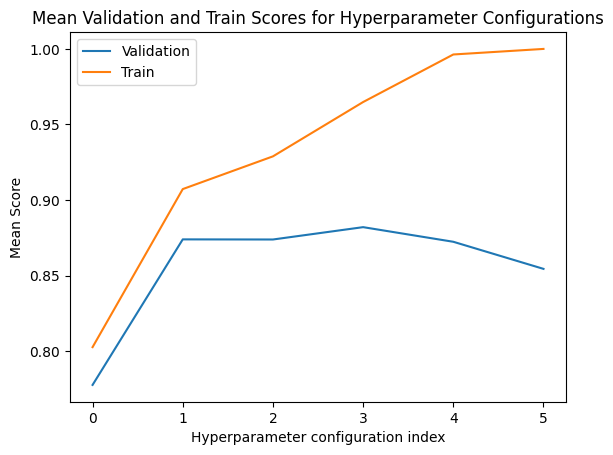

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define the grid search procedure
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', return_train_score=True)

# Execute the grid search
grid_result = grid_search.fit(X_std, y)

# Extract mean test and train scores from the grid search results
test_means = grid_result.cv_results_['mean_test_score']
train_means = grid_result.cv_results_['mean_train_score']

# Plot the mean test and train scores
plt.plot(test_means, label='Validation')
plt.plot(train_means, label='Train')
plt.legend(loc='best')
plt.xlabel('Hyperparameter configuration index')
plt.ylabel('Mean Score')
plt.title('Mean Validation and Train Scores for Hyperparameter Configurations')
plt.show()


Table for different feature variations with the best hyperparameter configuration

In [ ]:
# Create a table-like structure to display the results
best_table = pd.DataFrame({
    "Feature Selection": ["All features (30)", "First 5 Features",  "First 10 Features", "First 15 Features",  "First 20 Features" ],
    "Learning Rate": ["0.100000", "10.00", "0.100000", "0.100000", "10.00"],
    "Training Accuracy": [
       "0.885447",
        "0.750000",
        "0.831626",
        "0.880447",
        "0.882317"],
    "Validation Accuracy": [
       "0.885447",
        "0.751667",
        "0.831626",
        "0.880447",
        "0.882317"],
    "Variance": [
        "0.000000",
        "-0.001667",
        "0.000000",
        "0.000000",
        "0.000000"]
})

In [ ]:
best_table

,Feature Selection,Learning Rate,Training Accuracy,Validation Accuracy,Variance
0,All features (30),0.100000,0.885447,0.885447,0.000000
1,First 5 Features,10.00,0.750000,0.751667,-0.001667
2,First 10 Features,0.100000,0.831626,0.831626,0.000000
3,First 15 Features,0.100000,0.880447,0.880447,0.000000
4,First 20 Features,10.00,0.882317,0.882317,0.000000


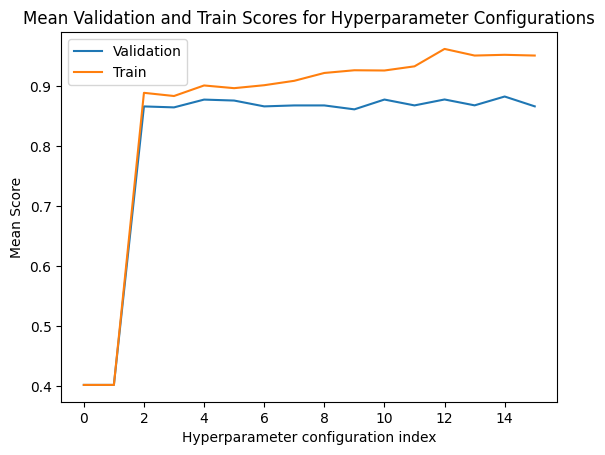

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the grid of values to search
grid = dict()
grid['C'] = [0.01, 0.1, 1, 10]
grid['penalty'] = ['l1', 'l2']
grid['solver'] = ['liblinear', 'saga']  # Add solvers for L1 regularization
#grid['max_iter'] = [100, 500, 1000]  # Add max iterations for convergence


# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define the grid search procedure
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', return_train_score=True)

# Execute the grid search
grid_result = grid_search.fit(X_std_20, y)

# Extract mean test and train scores from the grid search results
test_means = grid_result.cv_results_['mean_test_score']
train_means = grid_result.cv_results_['mean_train_score']

# Plot the mean test and train scores
plt.plot(test_means, label='Validation')
plt.plot(train_means, label='Train')
plt.legend(loc='best')
plt.xlabel('Hyperparameter configuration index')
plt.ylabel('Mean Score')
plt.title('Mean Validation and Train Scores for Hyperparameter Configurations')
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

# Assuming you have X_std and y from your data
# X_std: Your feature data after standardization
# y: Your target variable

# Create the logistic regression model with the best hyperparameters
best_log_model = LogisticRegression(
    C=1.0,
    penalty='l2',
    solver='liblinear',
    max_iter=500
)

# Define the evaluation procedure with k-fold cross-validation
k_folds = 5
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=1)

# Lists to store training and validation scores for each fold
train_accuracies = []
validation_accuracies = []
train_variances = []
validation_variances = []

# Perform cross-validation and get training and validation scores for each fold
for train_index, validation_index in cv.split(X_std_20, y):
    X_train, X_val = X_std_20[train_index], X_std_20[validation_index]
    y_train, y_val = y[train_index], y[validation_index]

    # Train the model on the training set within each fold
    best_log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = best_log_model.score(X_train, y_train)
    validation_accuracy = best_log_model.score(X_val, y_val)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    # Calculate and append the variance for each fold
    train_variance = np.var(best_log_model.predict(X_train) == y_train)
    validation_variance = np.var(best_log_model.predict(X_val) == y_val)
    train_variances.append(train_variance)
    validation_variances.append(validation_variance)

    # Print the accuracy and variance for the current fold
    print(f"Fold {len(train_accuracies)} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}, Training Variance: {train_variance:.4f}, Validation Variance: {validation_variance:.4f}")

# Calculate the average and standard deviation of both training and validation accuracies
average_training_accuracy = np.mean(train_accuracies)
std_training_accuracy = np.std(train_accuracies)

average_validation_accuracy = np.mean(validation_accuracies)
std_validation_accuracy = np.std(validation_accuracies)

# Calculate the average and standard deviation of both training and validation variances
average_training_variance = np.mean(train_variances)
std_training_variance = np.std(train_variances)

average_validation_variance = np.mean(validation_variances)
std_validation_variance = np.std(validation_variances)

print("\nOverall Statistics:")
print("Average Training Accuracy:", average_training_accuracy)
print("Standard Deviation of Training Accuracy:", std_training_accuracy)
print("Average Validation Accuracy:", average_validation_accuracy)
print("Standard Deviation of Validation Accuracy:", std_validation_accuracy)

print("Average Training Variance:", average_training_variance)
print("Standard Deviation of Training Variance:", std_training_variance)
print("Average Validation Variance:", average_validation_variance)
print("Standard Deviation of Validation Variance:", std_validation_variance)



Fold 1 - Training Accuracy: 0.9264, Validation Accuracy: 0.9024, Training Variance: 0.0682, Validation Variance: 0.0880
Fold 2 - Training Accuracy: 0.9264, Validation Accuracy: 0.8293, Training Variance: 0.0682, Validation Variance: 0.1416
Fold 3 - Training Accuracy: 0.9202, Validation Accuracy: 0.9512, Training Variance: 0.0734, Validation Variance: 0.0464
Fold 4 - Training Accuracy: 0.9264, Validation Accuracy: 0.7805, Training Variance: 0.0682, Validation Variance: 0.1713
Fold 5 - Training Accuracy: 0.9329, Validation Accuracy: 0.8750, Training Variance: 0.0626, Validation Variance: 0.1094

Overall Statistics:
Average Training Accuracy: 0.9264626664671555
Standard Deviation of Training Accuracy: 0.004011486940398479
Average Validation Accuracy: 0.8676829268292682
Standard Deviation of Validation Accuracy: 0.058853309814700744
Average Training Variance: 0.06811350208225073
Standard Deviation of Training Variance: 0.003423040136691101
Average Validation Variance: 0.11134555324211778
S

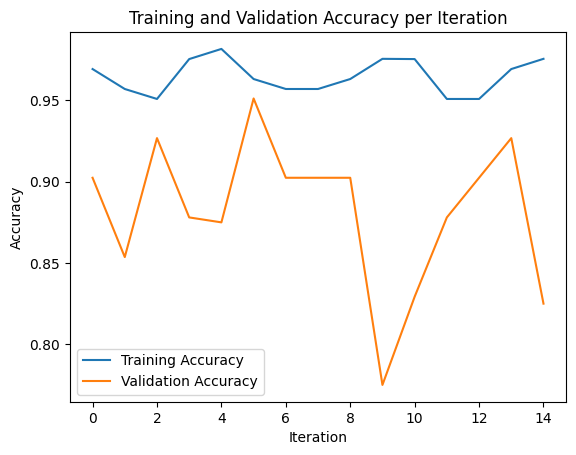

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Create the logistic regression model
log_model = LogisticRegression(max_iter=500)

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform k-fold cross-validation and store accuracies
train_accuracies = []
val_accuracies = []

for train_idx, val_idx in cv.split(X_std, y):
    X_train, X_val = X_std[train_idx], X_std[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Fit the model on the training data
    log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = log_model.score(X_train, y_train)
    val_accuracy = log_model.score(X_val, y_val)

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the training and validation accuracies
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Iteration')
plt.legend(loc='best')
plt.show()


In [31]:
train_accuracies

[0.9693251533742331,
 0.9570552147239264,
 0.950920245398773,
 0.9754601226993865,
 0.9817073170731707]

In [32]:
val_accuracies

[0.9024390243902439,
 0.8536585365853658,
 0.926829268292683,
 0.8780487804878049,
 0.875,
 0.9512195121951219,
 0.9024390243902439,
 0.9024390243902439,
 0.9024390243902439,
 0.775,
 0.8292682926829268,
 0.8780487804878049,
 0.9024390243902439,
 0.926829268292683,
 0.825]

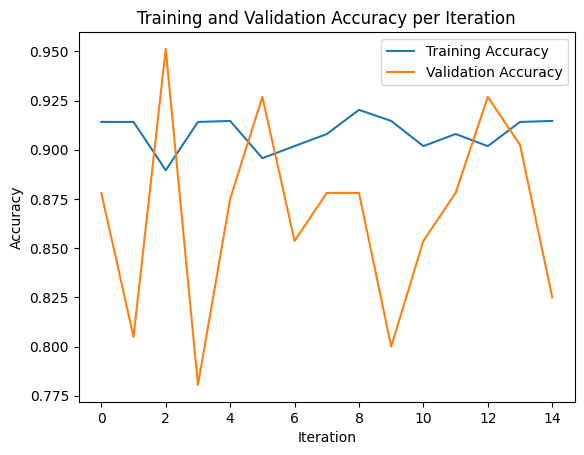

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Create the logistic regression model with regularization (C=0.1)
log_model = LogisticRegression(max_iter=500, C=0.1)

# Define the evaluation procedure with a larger number of folds (10-fold cross-validation)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform k-fold cross-validation and store accuracies
train_accuracies = []
val_accuracies = []

for train_idx, val_idx in cv.split(X_std_20, y):
    X_train, X_val = X_std_20[train_idx], X_std_20[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Fit the model on the training data
    log_model.fit(X_train, y_train)

    # Calculate training and validation accuracies
    train_accuracy = log_model.score(X_train, y_train)
    val_accuracy = log_model.score(X_val, y_val)

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the training and validation accuracies
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Iteration')
plt.legend(loc='best')
plt.show()


In [41]:
train_accuracies

[0.950920245398773,
 0.9263803680981595,
 0.9141104294478528,
 0.9263803680981595,
 0.9390243902439024,
 0.9141104294478528,
 0.9202453987730062,
 0.9202453987730062,
 0.9447852760736196,
 0.926829268292683,
 0.9263803680981595,
 0.9263803680981595,
 0.9263803680981595,
 0.9263803680981595,
 0.9451219512195121]

In [42]:
val_accuracies

[0.8780487804878049,
 0.8536585365853658,
 0.926829268292683,
 0.8536585365853658,
 0.85,
 0.926829268292683,
 0.8780487804878049,
 0.9024390243902439,
 0.9024390243902439,
 0.775,
 0.8536585365853658,
 0.8536585365853658,
 0.9024390243902439,
 0.926829268292683,
 0.825]